In [1]:
import numpy as np

# 生成400个在边长为30的正方形区域内均匀分布的样本点
samples = np.random.uniform(low=-15, high=15, size=(400, 2))

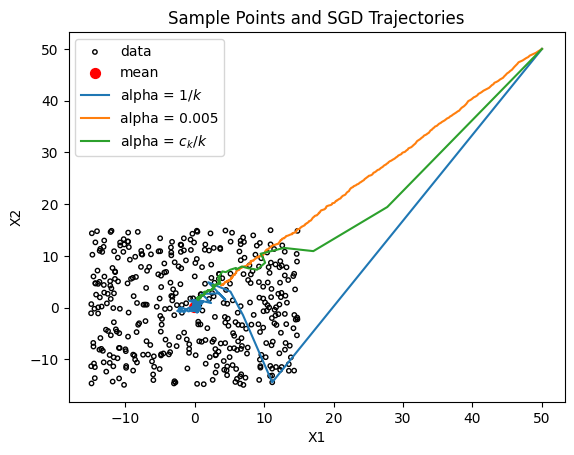

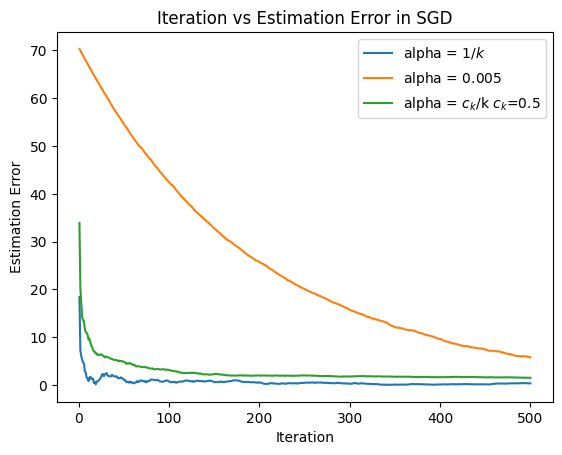

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 定义随机梯度下降函数
def sgd(samples, initial_w, alpha_func, num_iterations):
    w = initial_w
    w_history = [w]
    error_history = []

    for k in range(1, num_iterations + 1):
        alpha = alpha_func(k)
        # 随机选择一个样本点
        random_index = np.random.randint(0, len(samples))
        sample = samples[random_index]
        gradient = (w - sample)
        w = w - alpha * gradient
        w_history.append(w)

        # 计算估计误差
        
        error = np.linalg.norm(w - np.array([samples[:, 0].mean(), samples[:, 1].mean()]))
        error_history.append(error)

    return w_history, error_history

# 定义学习率函数
def alpha_1_over_k(k):
    return 1 / k

def alpha_constant(k):
    return 0.005

def alpha_ck_over_k(k):
    ck = 0.5  # 这里简单假设ck为1，可根据需要调整
    return ck / k

# 初始值
initial_w = np.array([50, 50])

# 运行随机梯度下降算法并获取结果
iter_num=500
w_history_1_over_k, error_history_1_over_k = sgd(samples, initial_w, alpha_1_over_k, iter_num)
w_history_constant, error_history_constant = sgd(samples, initial_w, alpha_constant, iter_num)
w_history_ck_over_k, error_history_ck_over_k = sgd(samples, initial_w, alpha_ck_over_k, iter_num)

# 可视化样本点的平面分布
plt.scatter(samples[:, 0], samples[:, 1], s = 10, facecolors='none', edgecolors='k',label='data')
meanPoint=np.array([samples[:, 0].mean(), samples[:, 1].mean()])
plt.scatter(meanPoint[0], meanPoint[1], s = 50, color='r',label='mean')
# 可视化随机梯度下降方法的轨迹
for w_history, label in zip([w_history_1_over_k, w_history_constant, w_history_ck_over_k],
                            ['alpha = $1/k$', 'alpha = 0.005', 'alpha = $c_k/k$']):
    w_history = np.array(w_history)
    plt.plot(w_history[:, 0], w_history[:, 1], label=label)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sample Points and SGD Trajectories')
plt.legend()
plt.show()

# 可视化迭代次数与估计误差
plt.plot(range(1, iter_num+1), error_history_1_over_k, label='alpha = $1/k$')
plt.plot(range(1, iter_num+1), error_history_constant, label='alpha = $0.005$')
plt.plot(range(1, iter_num+1), error_history_ck_over_k, label='alpha = $c_k$/k $c_k$=0.5')
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.title('Iteration vs Estimation Error in SGD')
plt.legend()
plt.show()

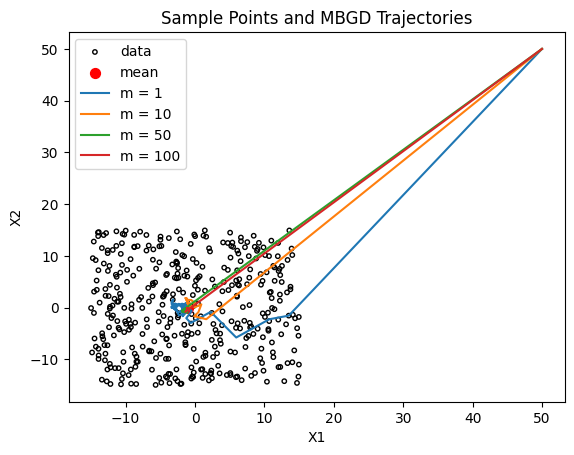

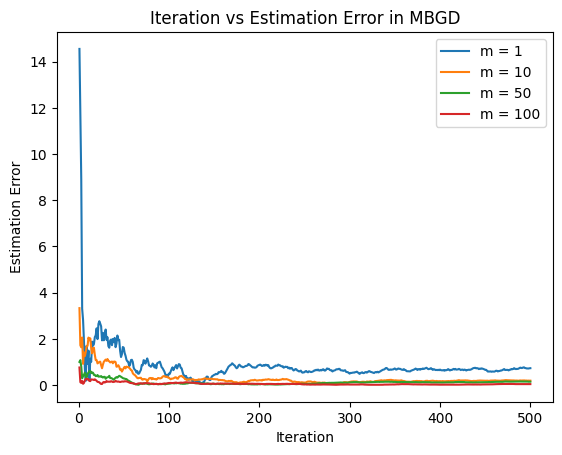

In [3]:
import matplotlib.pyplot as plt
import numpy as np


# 定义小批量梯度下降函数
def mbgd(samples, initial_w, alpha_func, num_iterations, m):
    w = initial_w
    w_history = [w]
    error_history = []

    for k in range(1, num_iterations + 1):
        alpha = alpha_func(k)
        # 随机选择一个小批量样本
        batch_indices = np.random.choice(len(samples), m, replace=False)
        batch = samples[batch_indices]
        gradient = np.mean([(w - sample) for sample in batch], axis=0)
        w = w - alpha * gradient
        w_history.append(w)

        # 计算估计误差
        error = np.linalg.norm(w - np.array([samples[:, 0].mean(), samples[:, 1].mean()]))
        error_history.append(error)

    return w_history, error_history


# 定义学习率函数
def alpha_1_over_k(k):
    return 1 / k


# 生成400个在边长为30的正方形区域内均匀分布的样本点
samples = np.random.uniform(low=-15, high=15, size=(400, 2))

# 初始值
initial_w = np.array([50, 50])

# 运行小批量梯度下降算法并获取结果
w_histories = []
error_histories = []
iter_num=500
for m in [1, 10, 50, 100]:
    w_history_m, error_history_m = mbgd(samples, initial_w, alpha_1_over_k, iter_num, m)
    w_histories.append(w_history_m)
    error_histories.append(error_history_m)

# 可视化样本点的平面分布
plt.scatter(samples[:, 0], samples[:, 1], s = 10, facecolors='none', edgecolors='k',label='data')
meanPoint=np.array([samples[:, 0].mean(), samples[:, 1].mean()])
plt.scatter(meanPoint[0], meanPoint[1], s = 50, color='r',label='mean')

# 可视化小批量梯度下降方法的轨迹
for i, m in enumerate([1, 10, 50, 100]):
    w_history_m = np.array(w_histories[i])
    plt.plot(w_history_m[:, 0], w_history_m[:, 1], label=f'm = {m}')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sample Points and MBGD Trajectories')
plt.legend()
plt.show()

# 可视化迭代次数与估计误差
for i, m in enumerate([1, 10, 50, 100]):
    plt.plot(range(1, iter_num+1), error_histories[i], label=f'm = {m}')

plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.title('Iteration vs Estimation Error in MBGD')
plt.legend()
plt.show()